Brightness Adjusted Image:


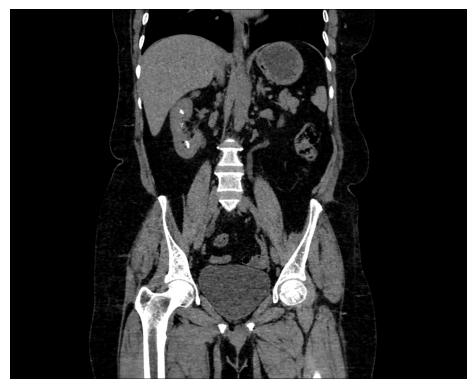

Grayscale Image:


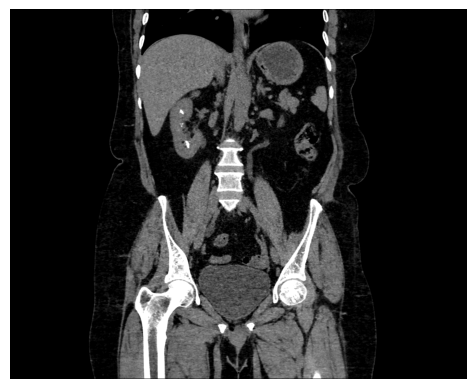

Blurred Image:


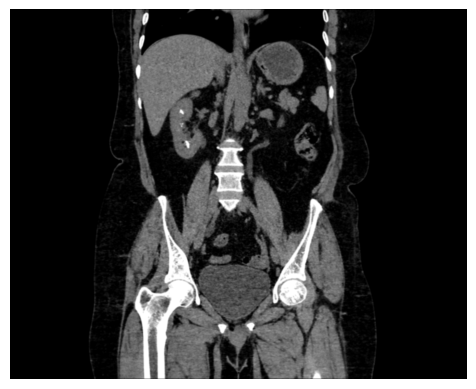

Binary Image:


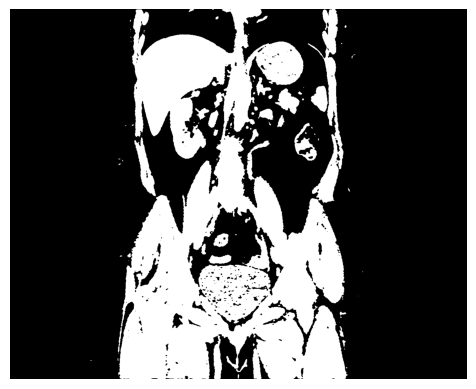

Opening Image:


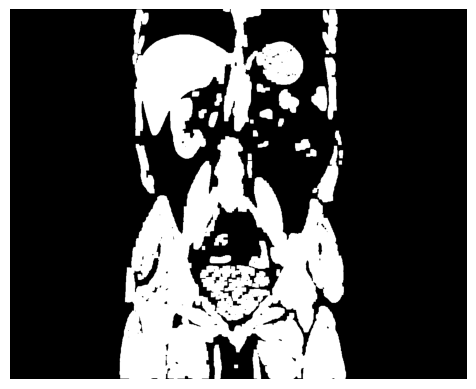

Background Mask Image:


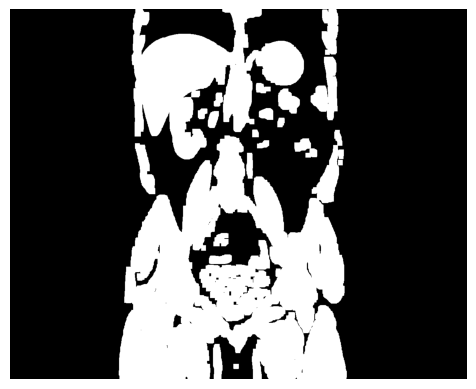

Foreground Mask Image:


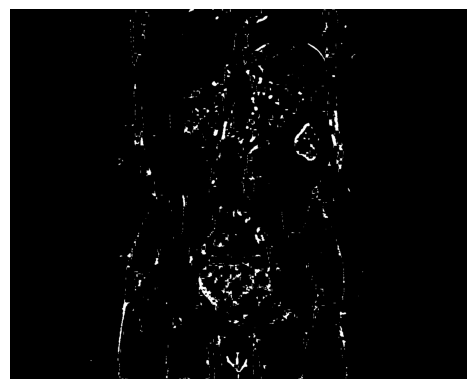

Segmentation Image:


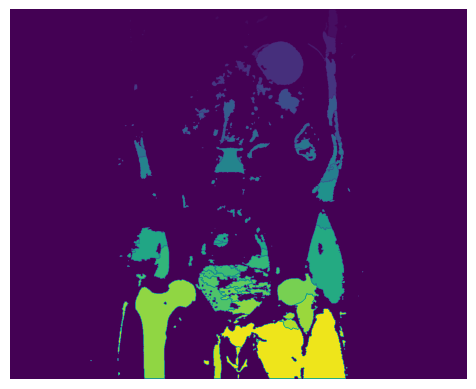

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       ...,
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int32)

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

# Read the image
image = mpimg.imread('Dataset/Stone/Stone- (1376).jpg')
image1 = mpimg.imread('Dataset/Stone/Stone- (74).jpg')

def processing(image, brightness_range=(0.0, 1.0)):
    # Apply brightness adjustment
    brightness_min, brightness_max = brightness_range
    adjusted_image = cv2.convertScaleAbs(image, alpha=brightness_max, beta=brightness_min)
    print("Brightness Adjusted Image:")
    plt.imshow(adjusted_image)
    plt.axis('off')
    plt.show()
    
    gray = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2GRAY)
    print("Grayscale Image:")
    plt.imshow(gray, cmap='gray')
    plt.axis('off')
    plt.show()
    
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    print("Blurred Image:")
    plt.imshow(gray, cmap='gray')
    plt.axis('off')
    plt.show()
    
    # Threshold the image to create a binary image
    _, binary_image = cv2.threshold(gray, 70 , 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    print("Binary Image:")
    plt.imshow(binary_image, cmap='gray')
    plt.axis('off')
    plt.show()

    # Create a kernel for the morphological operation
    kernel = np.ones((5,5), np.uint8)

    # Perform morphological opening to remove small objects
    opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)
    print("Opening Image:")
    plt.imshow(opening, cmap='gray')
    plt.axis('off')
    plt.show()

    # Create a mask for the background
    kernel1 = np.ones((3,3), np.uint8)
    background_mask = cv2.dilate(opening, kernel1, iterations=2)
    print("Background Mask Image:")
    plt.imshow(background_mask, cmap='gray')
    plt.axis('off')
    plt.show()

    # Create a mask for the foreground
    foreground_mask = cv2.subtract(binary_image, opening)
    print("Foreground Mask Image:")
    plt.imshow(foreground_mask, cmap='gray')
    plt.axis('off')
    plt.show()

    # Find the markers for the watershed transformation
    _, markers = cv2.connectedComponents(foreground_mask)

    # Add one to all labels so that the background is not 0, but 1
    markers += 1

    # Set the background to 0
    markers[background_mask == 255] = 0

    # Perform the watershed transformation
    segmentation = cv2.watershed(adjusted_image, markers)
    print("Segmentation Image:")
    plt.imshow(segmentation)
    plt.axis('off')
    plt.show()

    return segmentation

# Process the image
processing(image1)


In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

# Read the image
image = mpimg.imread('Dataset/Stone/Stone- (1376).jpg')
image1 = mpimg.imread('Dataset/Stone/Stone- (74).jpg')

def crop_brain_contour(image, plot=False):
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Canny Edge Detection Algortihm from OpenCV
    thresh = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    
    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    
    # Crop new image out of the original image using the four extreme points (left, right, top, bottom)
    for c in cnts:
        x, y, w, h = cv2.boundingRect(c)
        new_image = image[y:y+h, x:x+w]
        break
    
    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image

def processing(image):
    # Perform the segmentation
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, binary_image = cv2.threshold(blurred, 80 , 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=5)
    kernel1 = np.ones((5, 5), np.uint8)
    background_mask = cv2.dilate(opening, kernel1, iterations=5)
    foreground_mask = cv2.subtract(binary_image, opening)
    _, markers = cv2.connectedComponents(foreground_mask)
    markers += 1
    markers[background_mask == 255] = 0
    segmentation = cv2.watershed(cv2.cvtColor(image, cv2.COLOR_RGB2BGR), markers)
    
    # Crop the brain contour from the segmented image
    cropped_image = crop_brain_contour(cv2.cvtColor(segmentation, cv2.COLOR_GRAY2BGR))
    
    return cropped_image

# Process the image
processing(image)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)